# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Challenge 1

#### The data we will use in this challenge is:

In [8]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

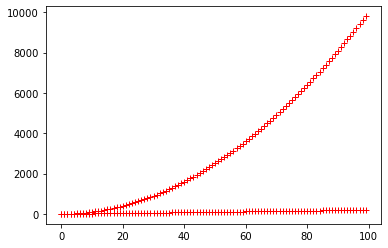

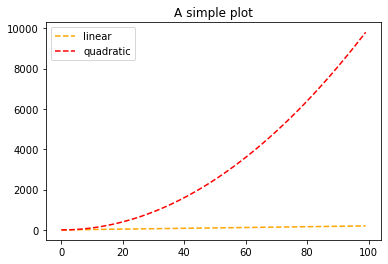

In [9]:
# Method 1
#split graphs
plt.plot([x],[y],'r+')
plt.plot([x],[z],'r+')
plt.show()

#both graphs together
plt.plot(x,y,'k--', color='orange',label='linear')
plt.plot(x,z,'r--',label='quadratic')
plt.title('A simple plot')
plt.legend()
plt.show()




#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

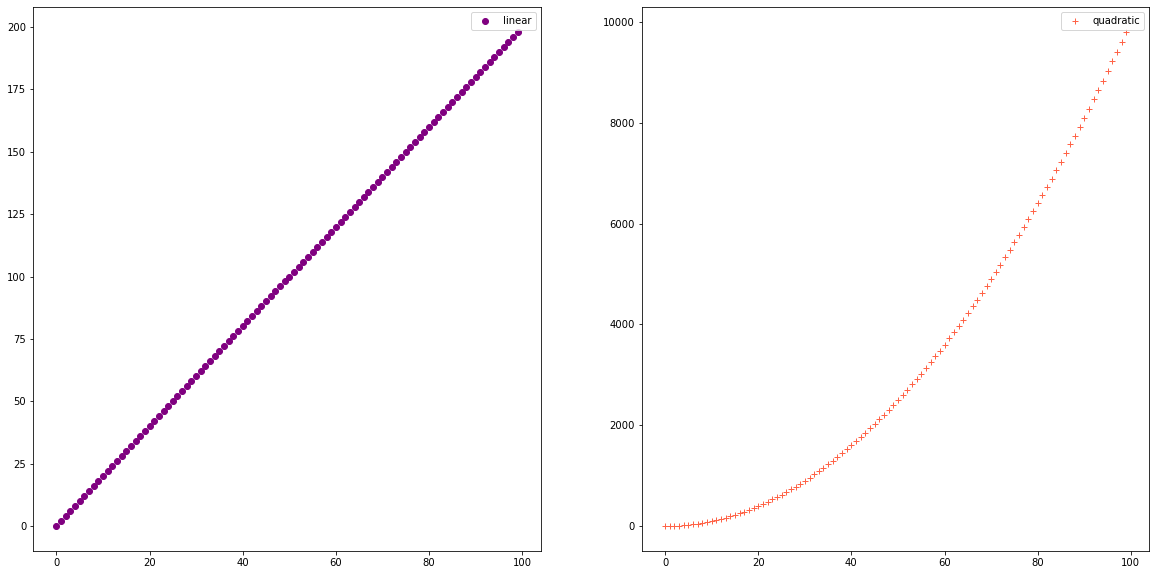

In [10]:
# Method 2
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (20,10))

ax1.plot(x, y,'go',color='purple', label='linear')

ax2.plot(x,z,'b+',color='#FF6347', label='quadratic')

ax1.legend()
ax2.legend()
plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

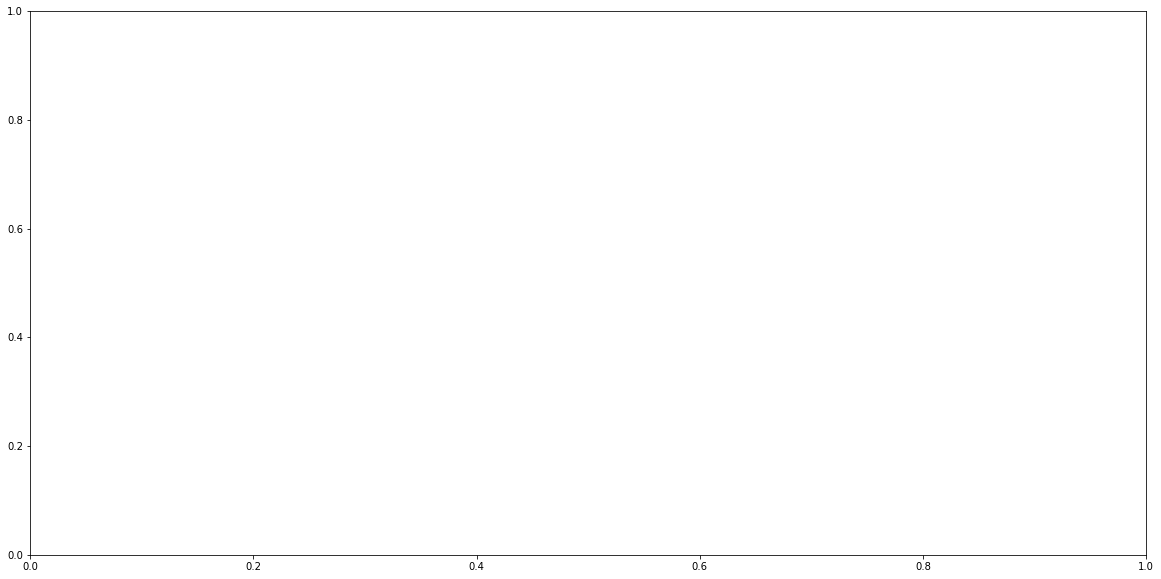

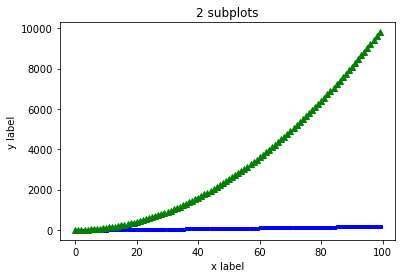

In [14]:
# your code here
fig, ax = plt.subplots(figsize = (20,10))
fig, ax = plt.subplots()

ax.plot(x, y, 's', color='blue',markersize = 3, label='linear')
ax.plot(x, z, 'g^', label='quadratic')

ax.set_xlabel('x label')
ax.set_ylabel('y label')
plt.title('2 subplots')
plt.show()

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

<ipython-input-15-111b8edd8e86>:20: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.tight_layout()  # otherwise the right y-label is slightly clipped


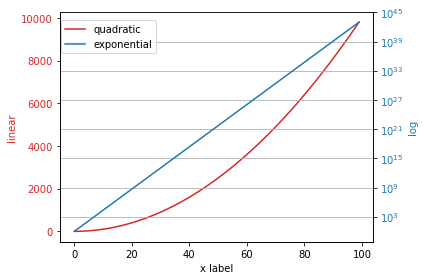

In [15]:
# your code here
fig, ax1 = plt.subplots(constrained_layout=True)

color = 'tab:red'
ax1.set_xlabel('x label')
ax1.set_ylabel('linear', color=color)
ax1.plot(x, x**2, color=color, label='quadratic')
ax1.tick_params(axis='y', labelcolor=color)
#ax1.set_ylim(0, 10000)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('log', color=color)  # we already handled the x-label with ax1
ax2.plot(x, np.exp(x), color=color, label='exponential')
ax2.set_yscale("log")
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim(0, 10**50)

fig.tight_layout()  # otherwise the right y-label is slightly clipped

#legend documentatio:
#https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html

fig.legend(bbox_to_anchor=(0.13,0.92),loc="upper left")
#fig.legend(bbox_to_anchor=(0.13,0.92),loc="upper left",frameon=False) #remove box

plt.grid(True)

plt.show()

#### As a bonus challenge, try to add a legend to the plot.

In [ ]:
# your code here

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [17]:
# your code here
fitbit = pd.read_csv('Fitbit2.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [18]:
fitbit['Work_Weekend'] = fitbit['Work_or_Weekend'].apply(lambda x: 'Week' if x==1 else 'Weekend')
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded,Work_Weekend
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5,Week
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5,Weekend
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5,Weekend
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5,Week
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5,Week
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,...,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5,Week
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,...,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5,Week
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,...,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5,Week
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,...,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5,Week


#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

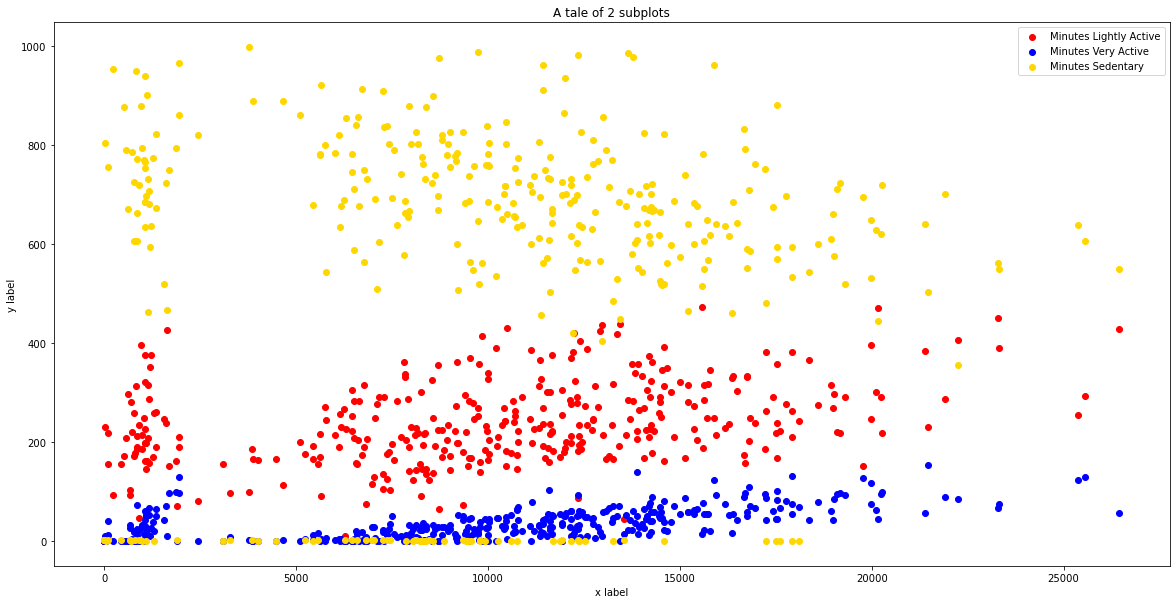

In [20]:
# your code here
fig, ax = plt.subplots(figsize = (20,10)) 
yaxes = ['Minutes Lightly Active', 'Minutes Very Active', 'Minutes Sedentary']
for y in yaxes:
    colours=['red','blue','gold']
    index = colours[yaxes.index(y)]
    ax.scatter(fitbit['Steps'],fitbit[str(y)],color=index,label=y)

ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
plt.title('A tale of 2 subplots')
ax.legend()  
plt.show()

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [21]:
# your code here
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [22]:
# your code here
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [23]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes(include='object').columns

Index(['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [24]:
# CATEGORICAL VARIABLES
# your code here
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
only_numerics = titanic.select_dtypes(include=numerics)
only_numerics.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

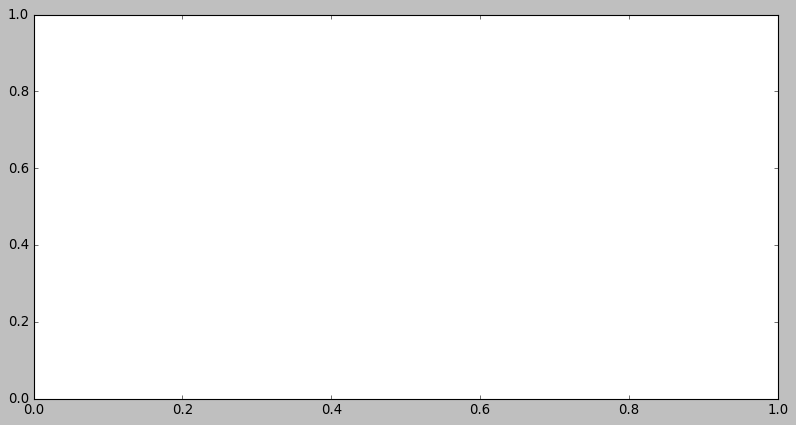

In [25]:
# your code here
with plt.style.context('classic'):
    fig, ax = plt.subplots(figsize = (12,6))
plt.style.use('classic')

#### Use the right visulalization to show the distribution of column `Age`.

(array([ 72.,  78., 326., 347., 220., 136.,  75.,  42.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <a list of 10 Patch objects>)

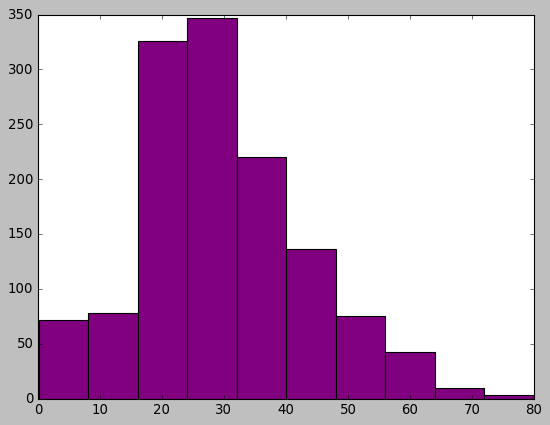

In [26]:
# your code here
plt.hist(titanic['Age'],color='purple')

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

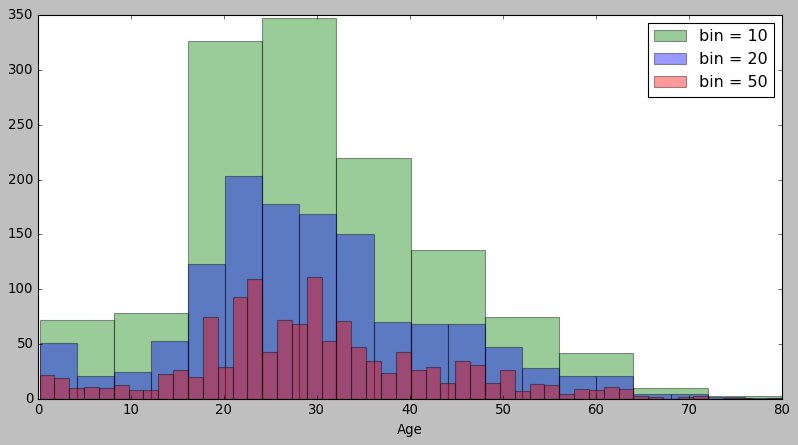

In [27]:
# your code here
fg, ax = plt.subplots(figsize = (12,6))
ax = sns.distplot(titanic['Age'],color='g',bins=10,kde=False,label='bin = 10') #kde = False remove the line
ax = sns.distplot(titanic['Age'],color='b',bins=20,kde=False, label= 'bin = 20') #kde = False remove the line
ax = sns.distplot(titanic['Age'],color='r',bins=50,kde=False, label='bin = 50') #kde = False remove the line
ax.legend()

#### How does the bin size affect your plot?

In [ ]:
"""
your comments heredecrease of Y axis and increase of bins.
"""

#### Use seaborn to show the distribution of column `Age`.

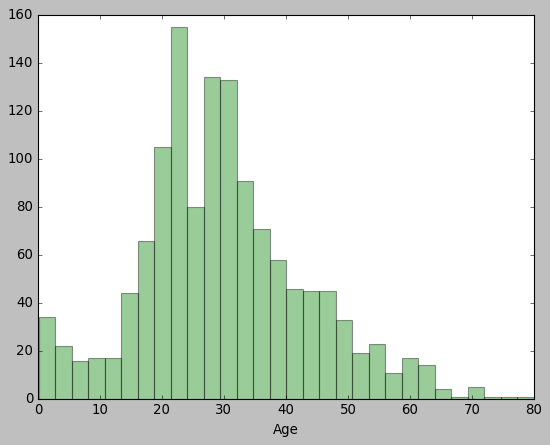

In [28]:
# your code here
ax = sns.distplot(titanic['Age'],color='g',kde=False)

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

<BarContainer object of 2 artists>

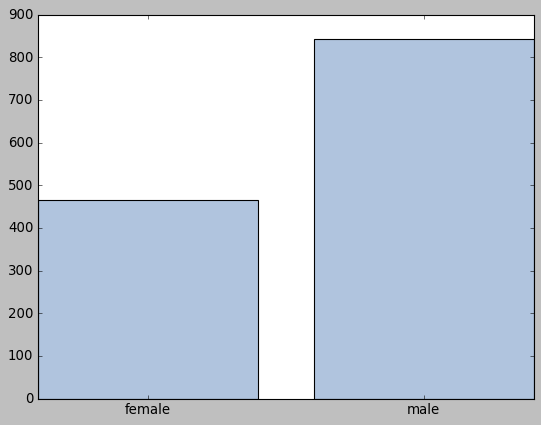

In [29]:
# Method 1 - matplotlib
# your code here
titanic['Male?'] = titanic['Gender'].apply(lambda x: True if x=='female' else False)

#bar chart
titanic_gender = titanic.groupby('Gender').agg({'Male?':'count'}).reset_index()
plt.bar(titanic_gender['Gender'], titanic_gender['Male?'],color='#B0C4DE')

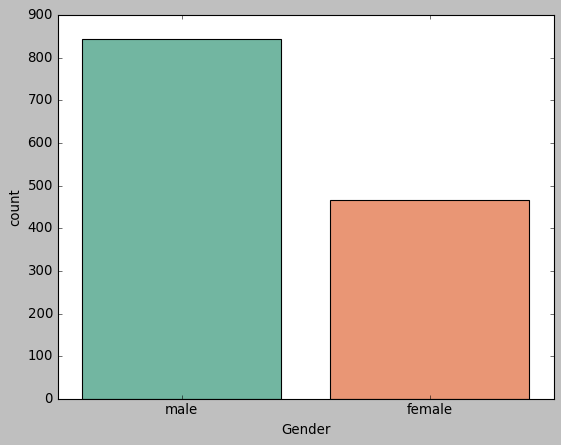

In [32]:
# Method 2 - seaborn
# your code here
ax = sns.countplot(x="Gender", data=titanic,palette="Set2")

#### Use the right plot to visualize the column `Pclass`.

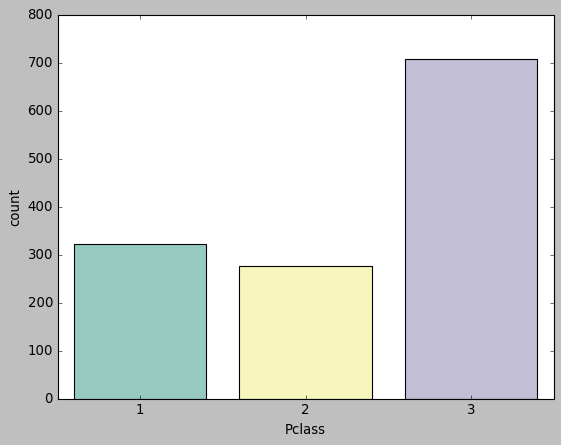

In [34]:
# your code here

ax = sns.countplot(x="Pclass", data=titanic,palette="Set3")

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

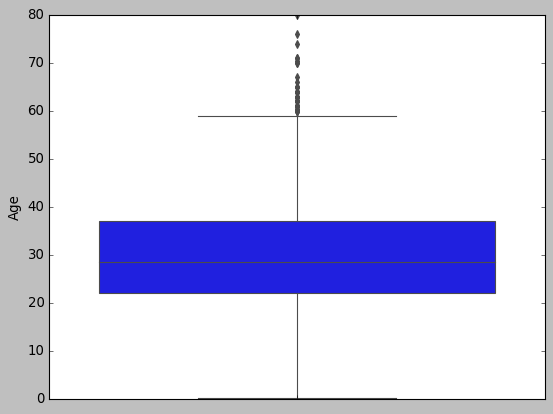

In [37]:
# your code here
age_statistics = titanic['Age'].describe()
sns.boxplot(y=titanic["Age"])

In [ ]:
"""
your comments here
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
your comments here
"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

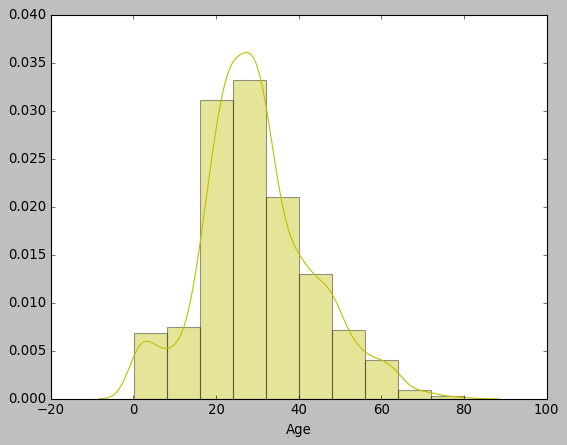

In [38]:
# your code here
ax = sns.distplot(titanic["Age"],color='y',bins=10)

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
most of the ages are in between 20 and 40 years old
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

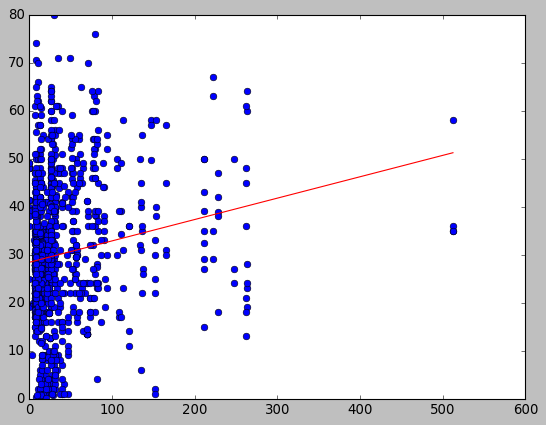

In [40]:
# Method 1 - matplotlib
from scipy.stats import linregress
from scipy import stats


gradient, intercept, r_value, p_value, std_err = stats.linregress(titanic['Fare'], titanic['Age'])
mn=np.min(titanic['Fare'])
mx=np.max(titanic['Fare'])
x1=np.linspace(mn,mx,5)
y1=gradient*x1+intercept
plt.plot(titanic['Fare'], titanic['Age'],'ob')
plt.plot(x1,y1,'-r')
plt.show()

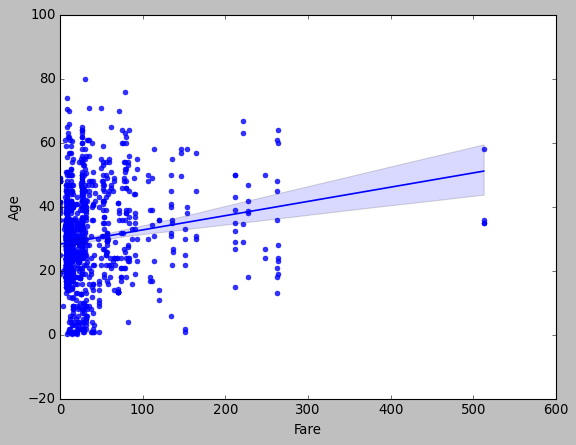

In [41]:
# Method 2 - seaborn
ax = sns.regplot(x='Fare', y='Age', data=titanic)

#### Plot the correlation matrix using seaborn.

Text(0.5, 1.0, 'Correlation Heatmap')

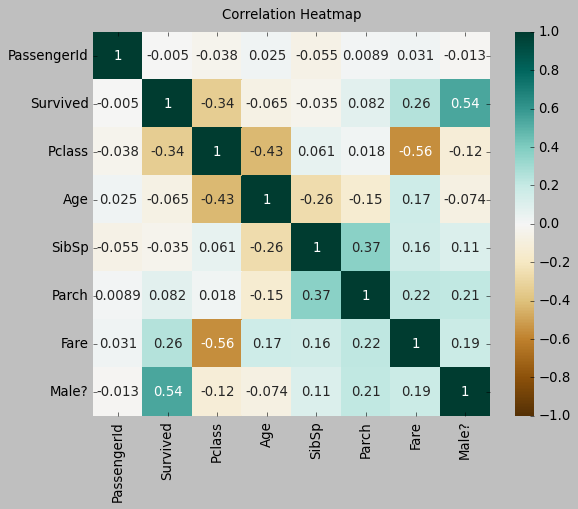

In [43]:
heatmap = sns.heatmap(titanic.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

#### What are the most correlated features?

In [ ]:
"""
:O 
"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

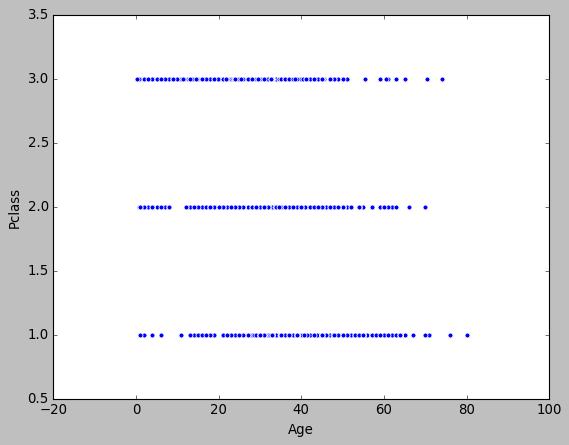

In [44]:
sns.scatterplot(x="Age", y="Pclass",data=titanic)

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

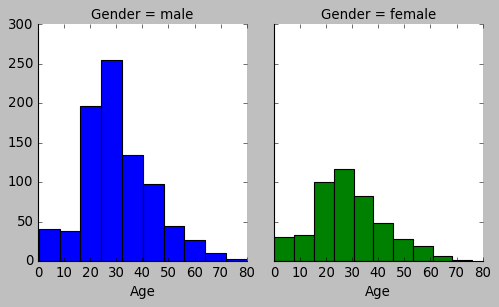

In [45]:
grid = sns.FacetGrid(titanic, col="Gender", hue='Gender', height=4, aspect=0.8)
graph = grid.map(plt.hist, "Age")
